# Titanic - Machine Learning from Disaster

Ê≠§Êï∏ÊìöÂàÜÊûêÂ†±ÂëäÁöÑÁõÆÁöÑÊòØÔºåÂü∫ÊñºÊ≥∞Âù¶Â∞ºÂÖãËôü‰πòÂÆ¢ÁöÑÊÄßÂà•ÂíåËàπËâôÁ≠âÁ¥öÁ≠âÂ±¨ÊÄßÔºåÂ∞çÂÄñÂ≠òÊÉÖÊ≥ÅÈÄ≤Ë°åÈÇèËºØÂõûÊ≠∏ÂàÜÊûêÔºåÂæûËÄåËÉΩÂà©Áî®ÂæóÂà∞ÁöÑÊ®°ÂûãÔºåÂ∞çÊú™Áü•ÂÄñÂ≠òÊÉÖÊ≥ÅÁöÑ‰πòÂÆ¢ÔºåÊ†πÊìöÂ±¨ÊÄßÈ†êÊ∏¨ÊòØÂê¶ÂæûÊ≤âËàπ‰∫ã‰ª∂‰∏≠ÂÄñÂ≠ò„ÄÇ

Ê¨Ñ‰ΩçË™™Êòé:

- PassengerId: ‰πòÂÆ¢Á∑®Ëôü
- Survived: ÊòØÂê¶Â≠òÊ¥ª
- Pclass: ËâôÁ≠â
- Name: ÂßìÂêç
- Sex: ÊÄßÂà•
- Age: Âπ¥ÈΩ°
- SibSp: ÂêåË°åÂÖÑÂºüÂßäÂ¶π/ÈÖçÂÅ∂Êï∏
- Parch: ÂêåË°åÁà∂ÊØç/Â≠êÂ•≥Êï∏
- Ticket: Á•®Ëôü
- Fare: ËàπÁ•®ÂÉπÊ†º
- Cabin: ÂÆ¢ËâôÁ∑®Ëôü
- Embarked: ÁôªËàπÊ∏ØÂè£

## ËºâÂÖ•ÂáΩÂºèÂ∫´ËàáÂü∫Êú¨Ë®≠ÂÆö

In [711]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## ËºâÂÖ•Ë≥áÊñô

In [712]:
train_raw_df = pd.read_csv('../raw_data/train.csv')
train_raw_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Ë≥áÊñôÂü∫Êú¨Êû∂ÊßãÊ™¢Êü•

In [713]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [714]:
train_raw_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Ê†πÊìöÂâçËø∞ÁµêÊûúÂàÜÊûêÂ¶Ç‰∏ã

- Pclass: ÁÑ°ÈúÄË™øÊï¥ÔºåÁÇ∫ category
- Name: ÁÑ°ÊÑèÁæ©ÔºåÂà™Èô§Ë©≤Ê¨Ñ‰Ωç
- Sex: ÈúÄËΩâÊèõÈ°ûÂà•ÔºåÁÇ∫ category
- Age: ÊúâÁº∫Â§±ÂÄºÔºåÈúÄË£úÂÄº
- SibSp: ÁÑ°ÈúÄË™øÊï¥
- Parch: ÁÑ°ÈúÄË™øÊï¥
- Ticket: ÁÑ°ÊÑèÁæ©ÔºåÂà™Èô§Ë©≤Ê¨Ñ‰Ωç
- Fare: ÁÑ°ÈúÄË™øÊï¥
- Cabin: ÊúâÁº∫Â§±ÂÄºÔºå‰ΩÜÁº∫Â§±ÂÄºÈÅéÂ§öÔºåÂà™Èô§Ë©≤Ê¨Ñ‰Ωç
- Embarked: ÈúÄËΩâÊèõÈ°ûÂà•ÁÇ∫ categoryÔºå‰∏îÊúâÁº∫Â§±ÂÄºÔºåÈúÄË£úÂÄº

## Ë≥áÊñôÂâçËôïÁêÜ

In [715]:
train_processed_df = train_raw_df.copy()

In [716]:
def fill_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    return df

In [717]:
def cast_data_type(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    df['Pclass'] = df['Pclass'].astype('category')
    df['Sex'] = df['Sex'].astype('category')
    df['SibSp'] = df['SibSp'].astype('float64')
    df['Parch'] = df['Parch'].astype('float64')
    df['Embarked'] = df['Embarked'].astype('category')

    return df

In [718]:
train_processed_df = fill_missing_values(train_processed_df)
train_processed_df = cast_data_type(train_processed_df)

In [719]:
train_processed_df.head()

PassengerId  Survived Pclass  \
0            1         0      3   
1            2         1      1   
2            3         1      3   
3            4         1      1   
4            5         0      3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen, Miss. Laina  female  26.0    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen, Mr. William Henry    male  35.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0         A/5 21171   7.2500   NaN        S  
1    0.0          PC 17599  71.2833   C85        C  
2    0.0  STON/O2. 3101282   7.9250   NaN        S  
3    0.0            113803  53.1000  C123        S  
4    0.0            373450   8.0500   NaN        S

In [720]:
train_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    float64 
 7   Parch        891 non-null    float64 
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
dtypes: category(3), float64(4), int64(2), object(3)
memory usage: 65.8+ KB


In [721]:
train_processed_df.describe()

PassengerId    Survived         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838   29.361582    0.523008    0.381594   32.204208
std     257.353842    0.486592   13.019697    1.102743    0.806057   49.693429
min       1.000000    0.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000   22.000000    0.000000    0.000000    7.910400
50%     446.000000    0.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000   35.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000   80.000000    8.000000    6.000000  512.329200

## Ë≥áÊñôÊé¢Á¥¢

### ÂÄñÂ≠òÊØî

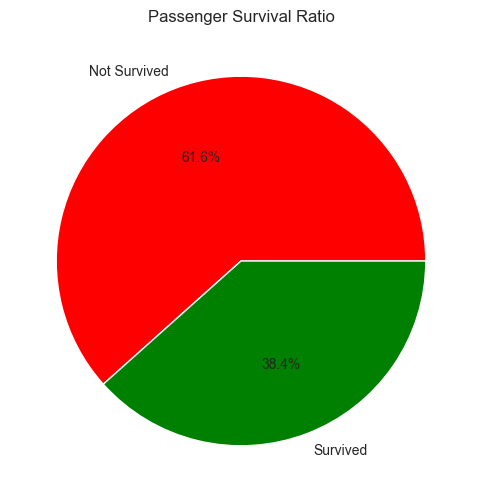

In [722]:
plt.figure(figsize=(8, 6))
survived_counts = train_processed_df['Survived'].value_counts()
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Passenger Survival Ratio')
plt.show()

Âæû‰ª•‰∏äÂúìÈ§ÖÂúñ‰æÜÁúãÔºåÈêµÈÅîÂ∞ºËôüÁΩπÈõ£‰πòÂÆ¢Â§öÊñºÂÄñÂ≠ò‰πòÂÆ¢ÔºåÊØî‰æãÁ¥Ñ 6:4

### ‰πòÂÆ¢Âπ¥ÈΩ°ÂàÜ‰Ωà

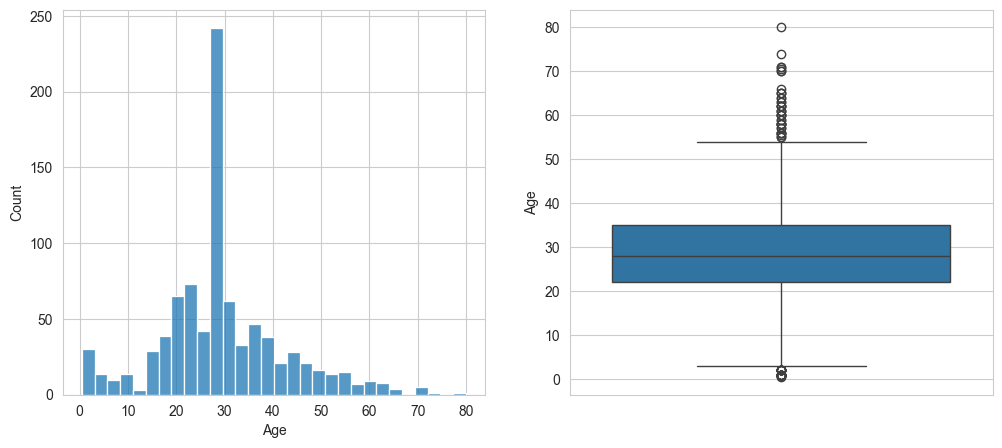

In [723]:
figure, axes = plt.subplots(1, 2, figsize=[12, 5])
sns.histplot(train_processed_df, x='Age', ax=axes[0])
sns.boxplot(train_processed_df, y='Age', ax=axes[1])
plt.show()

Â§ßÂ§öÊï∏‰πòÂÆ¢Âπ¥ÈΩ°‰ΩçÊñº 20 Ê≠≤Âà∞ 40 Ê≠≤‰πãÈñìÔºå‰ΩÜÊúâ‰∏çÂ∞ëËÄÅÂπ¥‰πòÂÆ¢‰ª•ÂèäÂ¨∞ÂÖí

### ‰πòÂÆ¢Âπ¥ÈΩ°ËàáÊòØÂê¶ÂÄñÂ≠ò

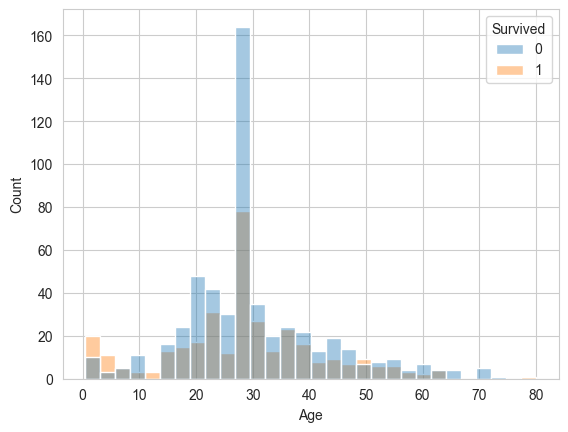

In [724]:
sns.histplot(train_processed_df, x='Age', hue='Survived', alpha=0.4)
plt.show()

Âæû‰πòÂÆ¢Âπ¥ÈΩ°Áõ¥ÊñπÂúñ‰æÜÁúãÔºåÂè™ÊúâÂ¨∞ÂÖíÁæ§ÂÄñÂ≠òÊØî‰æãËºÉÈ´òÔºåÁµïÂ§ßÈÉ®ÂàÜÂÖ∂È§òÂπ¥ÈΩ°Â±§ÈÉΩÊòØÁΩπÈõ£‰∫∫Êï∏Â§öÊñºÂÄñÂ≠ò‰∫∫Êï∏

### ËàπÁ•®ÂÉπÊ†ºÂàÜ‰Ωà

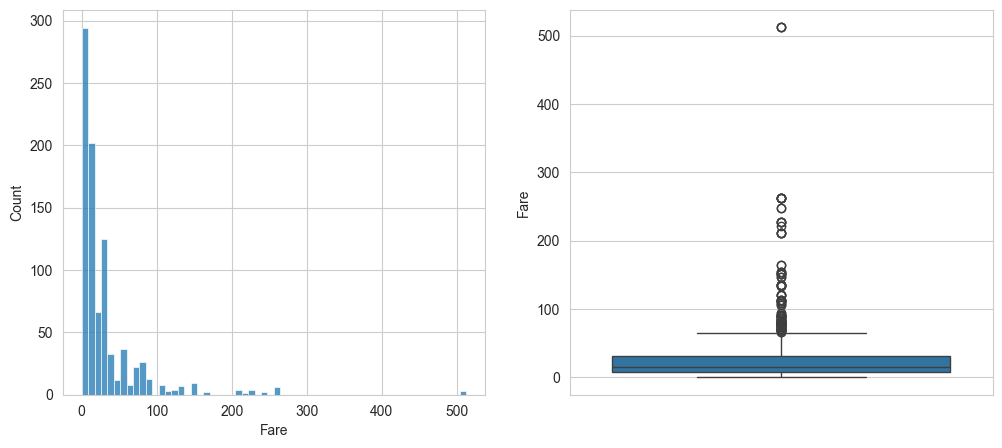

In [725]:
figure, axes = plt.subplots(1, 2, figsize=[12, 5])
sns.histplot(train_processed_df, x='Fare', ax=axes[0])
sns.boxplot(train_processed_df, y='Fare', ax=axes[1])
plt.show()

ËàπÁ•®ÈáëÈ°çÂëàÁèæÂè≥ÂÅèÊÖãÂàÜ‰ΩàÔºåÈ°ØÁ§∫Ë≥áÊñôÈõÜ‰∏≠ÁöÑÂ§ßÂ§öÊï∏ËàπÁ•®ÂÉπÊ†º‰∏≠Á≠âÔºå‰ΩÜÊúâ‰∏Ä‰∫õÁ•®ÂÉπÂæàÈ´òÁöÑÊ•µÁ´ØÂÄºÔºå‰ΩøÂæóÂπ≥ÂùáÂÄºË¢´ÊãâÈ´ò

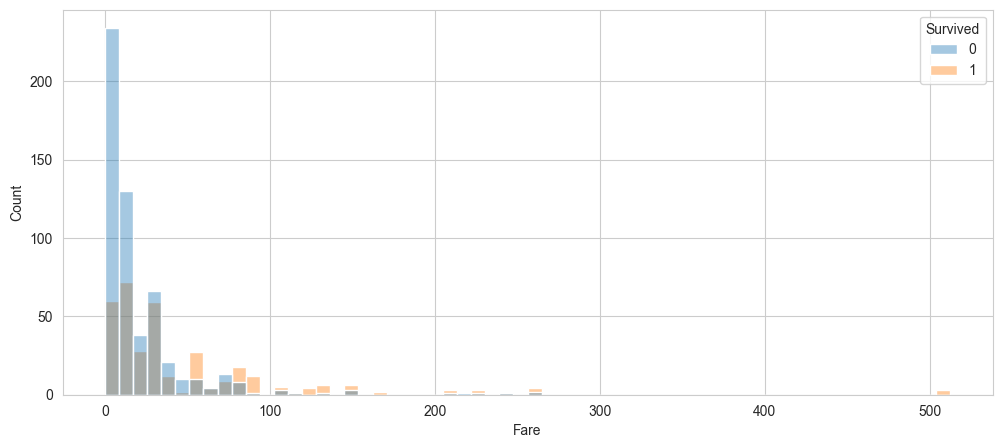

In [726]:
plt.subplots(1, 1, figsize=[12, 5])
sns.histplot(train_processed_df, x='Fare', hue='Survived', alpha=0.4)
plt.show()

### ËàπËâôÁ≠âÁ¥öËàáÊòØÂê¶ÂÄñÂ≠òÁöÑÈóú‰øÇ

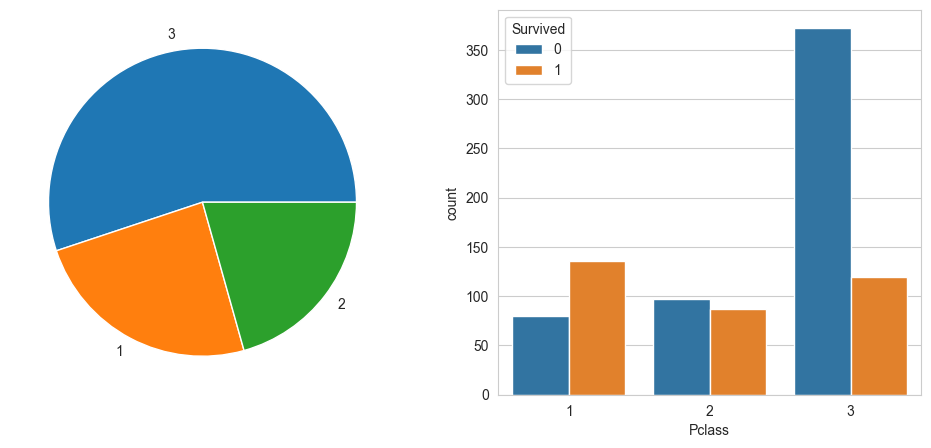

In [727]:
figure, axes = plt.subplots(1, 2, figsize=[12, 5])
pclass_count = train_processed_df['Pclass'].value_counts()
pclass_label = pclass_count.index
axes[0].pie(pclass_count, labels=pclass_label)
sns.countplot(train_processed_df, x='Pclass', hue='Survived', ax=axes[1])
plt.show()

ÂæûÊòØÂê¶ÂÄñÂ≠òËàáËàπËâôÁ≠âÁ¥ö‰πãÈñìÁöÑÈï∑Ê¢ùÂúñ‰æÜÁúãÔºåËàπËâôÁ≠âÁ¥ö‰ΩéÁöÑ‰πòÂÆ¢‰∏≠ÈÅáÈõ£ÊØî‰æãÊõ¥Â§ßÔºåËàπËâôÁ≠âÁ¥öÈ´òÁöÑ‰πòÂÆ¢‰∏≠ÂÄñÂ≠òÊØî‰æãÊõ¥Â§ß

### ÊÄßÂà•ËàáÊòØÂê¶ÂÄñÂ≠òÁöÑÈóú‰øÇ

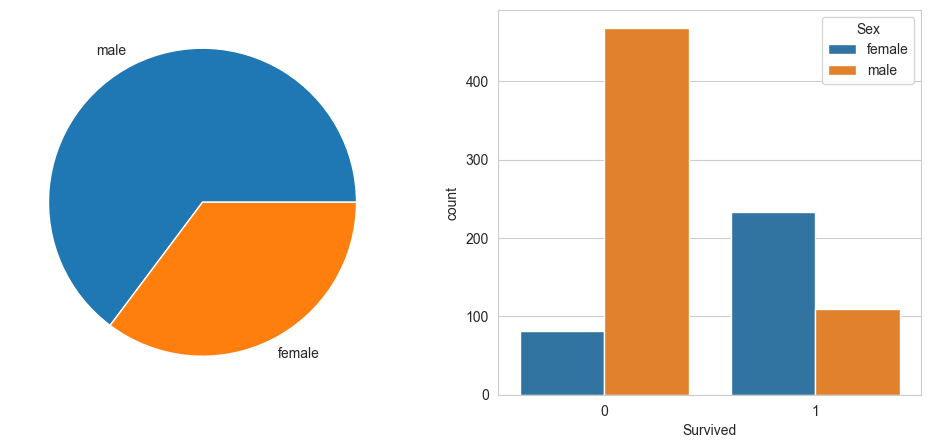

In [728]:
figure, axes = plt.subplots(1, 2, figsize=[12, 5])
sex_count = train_processed_df['Sex'].value_counts()
sex_label = sex_count.index
axes[0].pie(sex_count, labels=sex_label)
sns.countplot(train_processed_df, x='Survived', hue='Sex', ax=axes[1])
plt.show()

ÂæûÊòØÂê¶ÂÄñÂ≠òËàáÊÄßÂà•‰πãÈñìÁöÑÈï∑Ê¢ùÂúñ‰æÜÁúãÔºåÁî∑ÊÄß‰πòÂÆ¢‰∏≠ÈÅáÈõ£ÊØî‰æãÊõ¥Â§ßÔºåÂ•≥ÊÄß‰πòÂÆ¢‰∏≠ÂÄñÂ≠òÊØî‰æãÊõ¥Â§ß

### ÁôªËàπÊ∏ØËàáÊòØÂê¶ÂÄñÂ≠òÁöÑÈóú‰øÇ

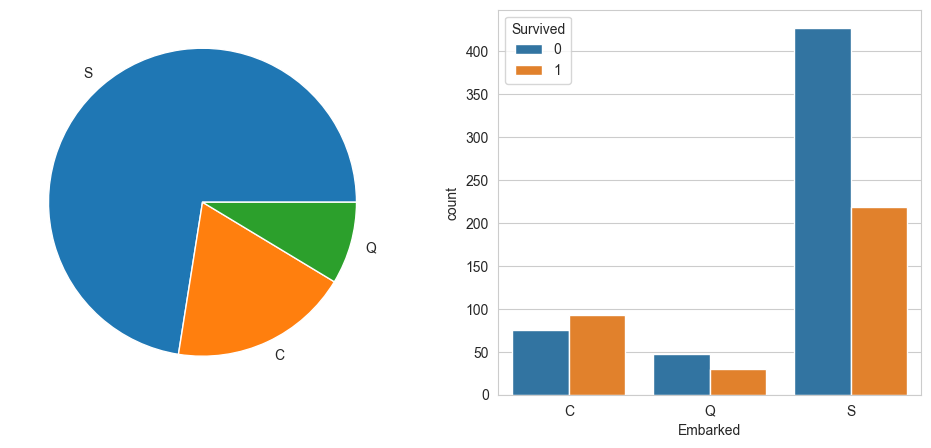

In [729]:
figure, axes = plt.subplots(1, 2, figsize=[12, 5])
embarked_count = train_processed_df['Embarked'].value_counts()
embarked_label = embarked_count.index
axes[0].pie(embarked_count, labels=embarked_label)
sns.countplot(train_processed_df, x='Embarked', hue='Survived', ax=axes[1])
plt.show()

ÂæûÊòØÂê¶ÂÄñÂ≠òËàáÁôªËàπÊ∏Ø‰πãÈñìÁöÑÈï∑Ê¢ùÂúñ‰æÜÁúãÔºåÁëüÂ†°ÁôªËàπÁöÑ‰πòÂÆ¢ÔºåÂÄñÂ≠òÊï∏ÈáèÂ§ßÊñºÈÅáÈõ£Êï∏ÈáèÔºåËÄåÁöáÂêéÈéÆÂíåÂçóÂÆâÊôÆÊï¶ÂâáÁõ∏Âèç

### ÂÆ∂Â∫≠ÊàêÂì°Êï∏ËàáÊòØÂê¶Â≠òÊ¥ªÁöÑÈóú‰øÇ

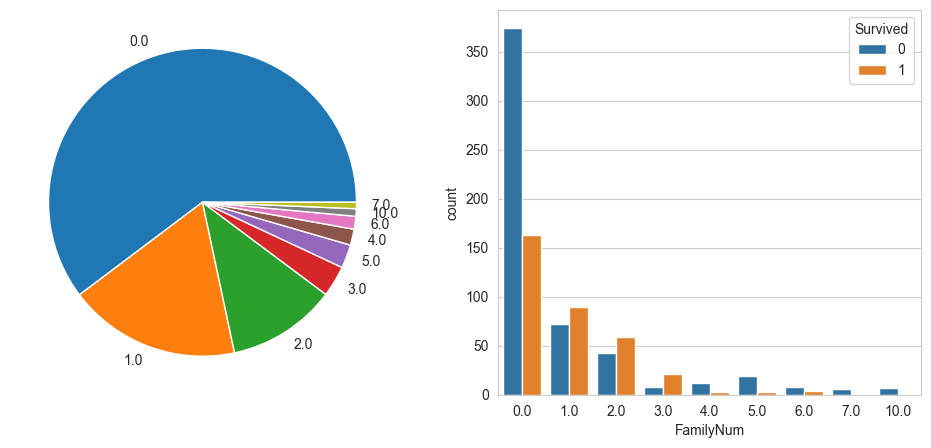

In [730]:
train_processed_df['FamilyNum'] = train_processed_df['SibSp'] + train_processed_df['Parch']

figure, axes = plt.subplots(1, 2, figsize=[12, 5])
familyNum_count = train_processed_df['FamilyNum'].value_counts()
familyNum_label = familyNum_count.index
axes[0].pie(familyNum_count, labels=familyNum_label)
sns.countplot(train_processed_df, x='FamilyNum', hue='Survived', ax=axes[1])
plt.show()

train_processed_df.drop(columns=['FamilyNum'], inplace=True)

ÂæûÊòØÂê¶ÂÄñÂ≠òËàá‰πòÂÆ¢ÂÆ∂Â∫≠ÊàêÂì°‰πãÈñìÁöÑÈï∑Ê¢ùÂúñ‰æÜÁúãÔºåÁç®Ë∫´ÁöÑ‰πòÂÆ¢‰∏≠ÈÅáÈõ£ÁöÑÂ§öÊñºÂÄñÂ≠òÁöÑ„ÄÇÂæûÊúâÊîúÂ∏∂ÂÆ∂Â∫≠ÊàêÂì°ÁöÑ‰πòÂÆ¢‰æÜÁúãÔºåÂÆ∂Â∫≠ÊàêÂì°Âú® 1ÔΩû3 ‰Ωç‰πãÈñìÁöÑÂÄñÂ≠ò‰∫∫Êï∏Ë∂ÖÈÅéÈÅáÈõ£‰∫∫Êï∏Ôºå‰ΩÜÂêå‰πòÂÆ∂Â∫≠ÊàêÂì°Ë∂ÖÈÅé3‰ΩçÂæåÔºåÈÅáÈõ£ÁöÑÊõ¥Â§ö

## ÁâπÂæµÂ∑•Á®ã

In [731]:
def create_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    df['FamilySize'] = df['SibSp'] + df['Parch']

    return df

In [732]:
def drop_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    drop_columns = ['Name', 'Ticket', 'Cabin']
    df = df.drop(columns=drop_columns)

    return df

In [733]:
train_processed_df = create_features(train_processed_df)
train_processed_df = drop_features(train_processed_df)

In [734]:
train_processed_df.head()

PassengerId  Survived Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0            1         0      3    male  22.0    1.0    0.0   7.2500        S   
1            2         1      1  female  38.0    1.0    0.0  71.2833        C   
2            3         1      3  female  26.0    0.0    0.0   7.9250        S   
3            4         1      1  female  35.0    1.0    0.0  53.1000        S   
4            5         0      3    male  35.0    0.0    0.0   8.0500        S   

   FamilySize  
0         1.0  
1         1.0  
2         0.0  
3         1.0  
4         0.0

In [735]:
train_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Sex          891 non-null    category
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    float64 
 6   Parch        891 non-null    float64 
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    category
 9   FamilySize   891 non-null    float64 
dtypes: category(3), float64(5), int64(2)
memory usage: 51.8 KB


In [736]:
train_processed_df.describe()

PassengerId    Survived         Age       SibSp       Parch  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838   29.361582    0.523008    0.381594   
std     257.353842    0.486592   13.019697    1.102743    0.806057   
min       1.000000    0.000000    0.420000    0.000000    0.000000   
25%     223.500000    0.000000   22.000000    0.000000    0.000000   
50%     446.000000    0.000000   28.000000    0.000000    0.000000   
75%     668.500000    1.000000   35.000000    1.000000    0.000000   
max     891.000000    1.000000   80.000000    8.000000    6.000000   

             Fare  FamilySize  
count  891.000000  891.000000  
mean    32.204208    0.904602  
std     49.693429    1.613459  
min      0.000000    0.000000  
25%      7.910400    0.000000  
50%     14.454200    0.000000  
75%     31.000000    1.000000  
max    512.329200   10.000000

## Ê®°ÂûãË®ìÁ∑¥

In [737]:
X = train_processed_df.drop(columns=['Survived', 'PassengerId'])
y = train_processed_df['Survived']

In [738]:
categorical_features = ['Pclass', 'Sex', 'Embarked']
numerical_features = ['Age', 'Fare', 'FamilySize']

categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('cat', categorical_transformer, categorical_features),
    ('num', numerical_transformer, numerical_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [739]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
}

results = cross_validate(pipeline, X, y, cv=kf, scoring=scoring, return_train_score=True)

print("üîç Ë®ìÁ∑¥ÈõÜÁµêÊûú (Âπ≥Âùá)")
print(f"‚úÖ Accuracy: {results['train_accuracy'].mean():.4f}")
print(f"üéØ Precision: {results['train_precision'].mean():.4f}")
print(f"üì¢ Recall: {results['train_recall'].mean():.4f}")
print(f"üìä F1 Score: {results['train_f1'].mean():.4f}")
print(f"üìà ROC AUC: {results['train_roc_auc'].mean():.4f}")

print("üîç Ê∏¨Ë©¶ÈõÜÁµêÊûú (Âπ≥Âùá)")
print(f"‚úÖ Accuracy: {results['test_accuracy'].mean():.4f}")
print(f"üéØ Precision: {results['test_precision'].mean():.4f}")
print(f"üì¢ Recall: {results['test_recall'].mean():.4f}")
print(f"üìä F1 Score: {results['test_f1'].mean():.4f}")
print(f"üìà ROC AUC: {results['test_roc_auc'].mean():.4f}")

üîç Ë®ìÁ∑¥ÈõÜÁµêÊûú (Âπ≥Âùá)
‚úÖ Accuracy: 0.8148
üéØ Precision: 0.7823
üì¢ Recall: 0.7170
üìä F1 Score: 0.7482
üìà ROC AUC: 0.8634
üîç Ê∏¨Ë©¶ÈõÜÁµêÊûú (Âπ≥Âùá)
‚úÖ Accuracy: 0.8025
üéØ Precision: 0.7665
üì¢ Recall: 0.6916
üìä F1 Score: 0.7259
üìà ROC AUC: 0.8445


In [740]:
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare',
                                                   'FamilySize'])])),
                ('classifier', LogisticRegression())])

In [741]:
y_pred = pipeline.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))
print("F1 Score:", f1_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))

Accuracy: 0.8170594837261503
F1 Score: 0.7503828483920367
Precision: 0.7877813504823151
Recall: 0.716374269005848


## È†êÊ∏¨

In [742]:
test_raw_df = pd.read_csv('../raw_data/test.csv')
test_raw_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [743]:
test_processed_df = test_raw_df.copy()
test_processed_df = fill_missing_values(test_processed_df)
test_processed_df = cast_data_type(test_processed_df)
test_processed_df = create_features(test_processed_df)
test_processed_df = drop_features(test_processed_df)

In [744]:
test_processed_df.head()

PassengerId Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0          892      3    male  34.5    0.0    0.0   7.8292        Q   
1          893      3  female  47.0    1.0    0.0   7.0000        S   
2          894      2    male  62.0    0.0    0.0   9.6875        Q   
3          895      3    male  27.0    0.0    0.0   8.6625        S   
4          896      3  female  22.0    1.0    1.0  12.2875        S   

   FamilySize  
0         0.0  
1         1.0  
2         0.0  
3         0.0  
4         2.0

In [745]:
X = test_processed_df.drop(columns=['PassengerId'])

In [746]:
y_pred = pipeline.predict(X)
submission_df = pd.DataFrame({'PassengerId': test_raw_df['PassengerId'], 'Survived': y_pred})
submission_df.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [747]:
submission_df.to_csv('submission.csv', index=False)